In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
img_size = (224, 224)
num_classes = 2
batch_size = 32

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# create an instance of the MobileNetV3Small model with pre-trained weights
mobilenetv3small = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=(*img_size, 3))

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in mobilenetv3small.layers:
    layer.trainable = False

In [ ]:
# add a custom head to the model
x = mobilenetv3small.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=mobilenetv3small.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

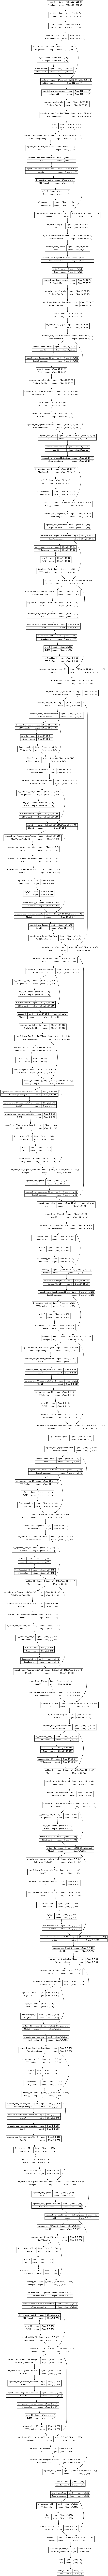

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 25.6 MB/s eta 0:00:00


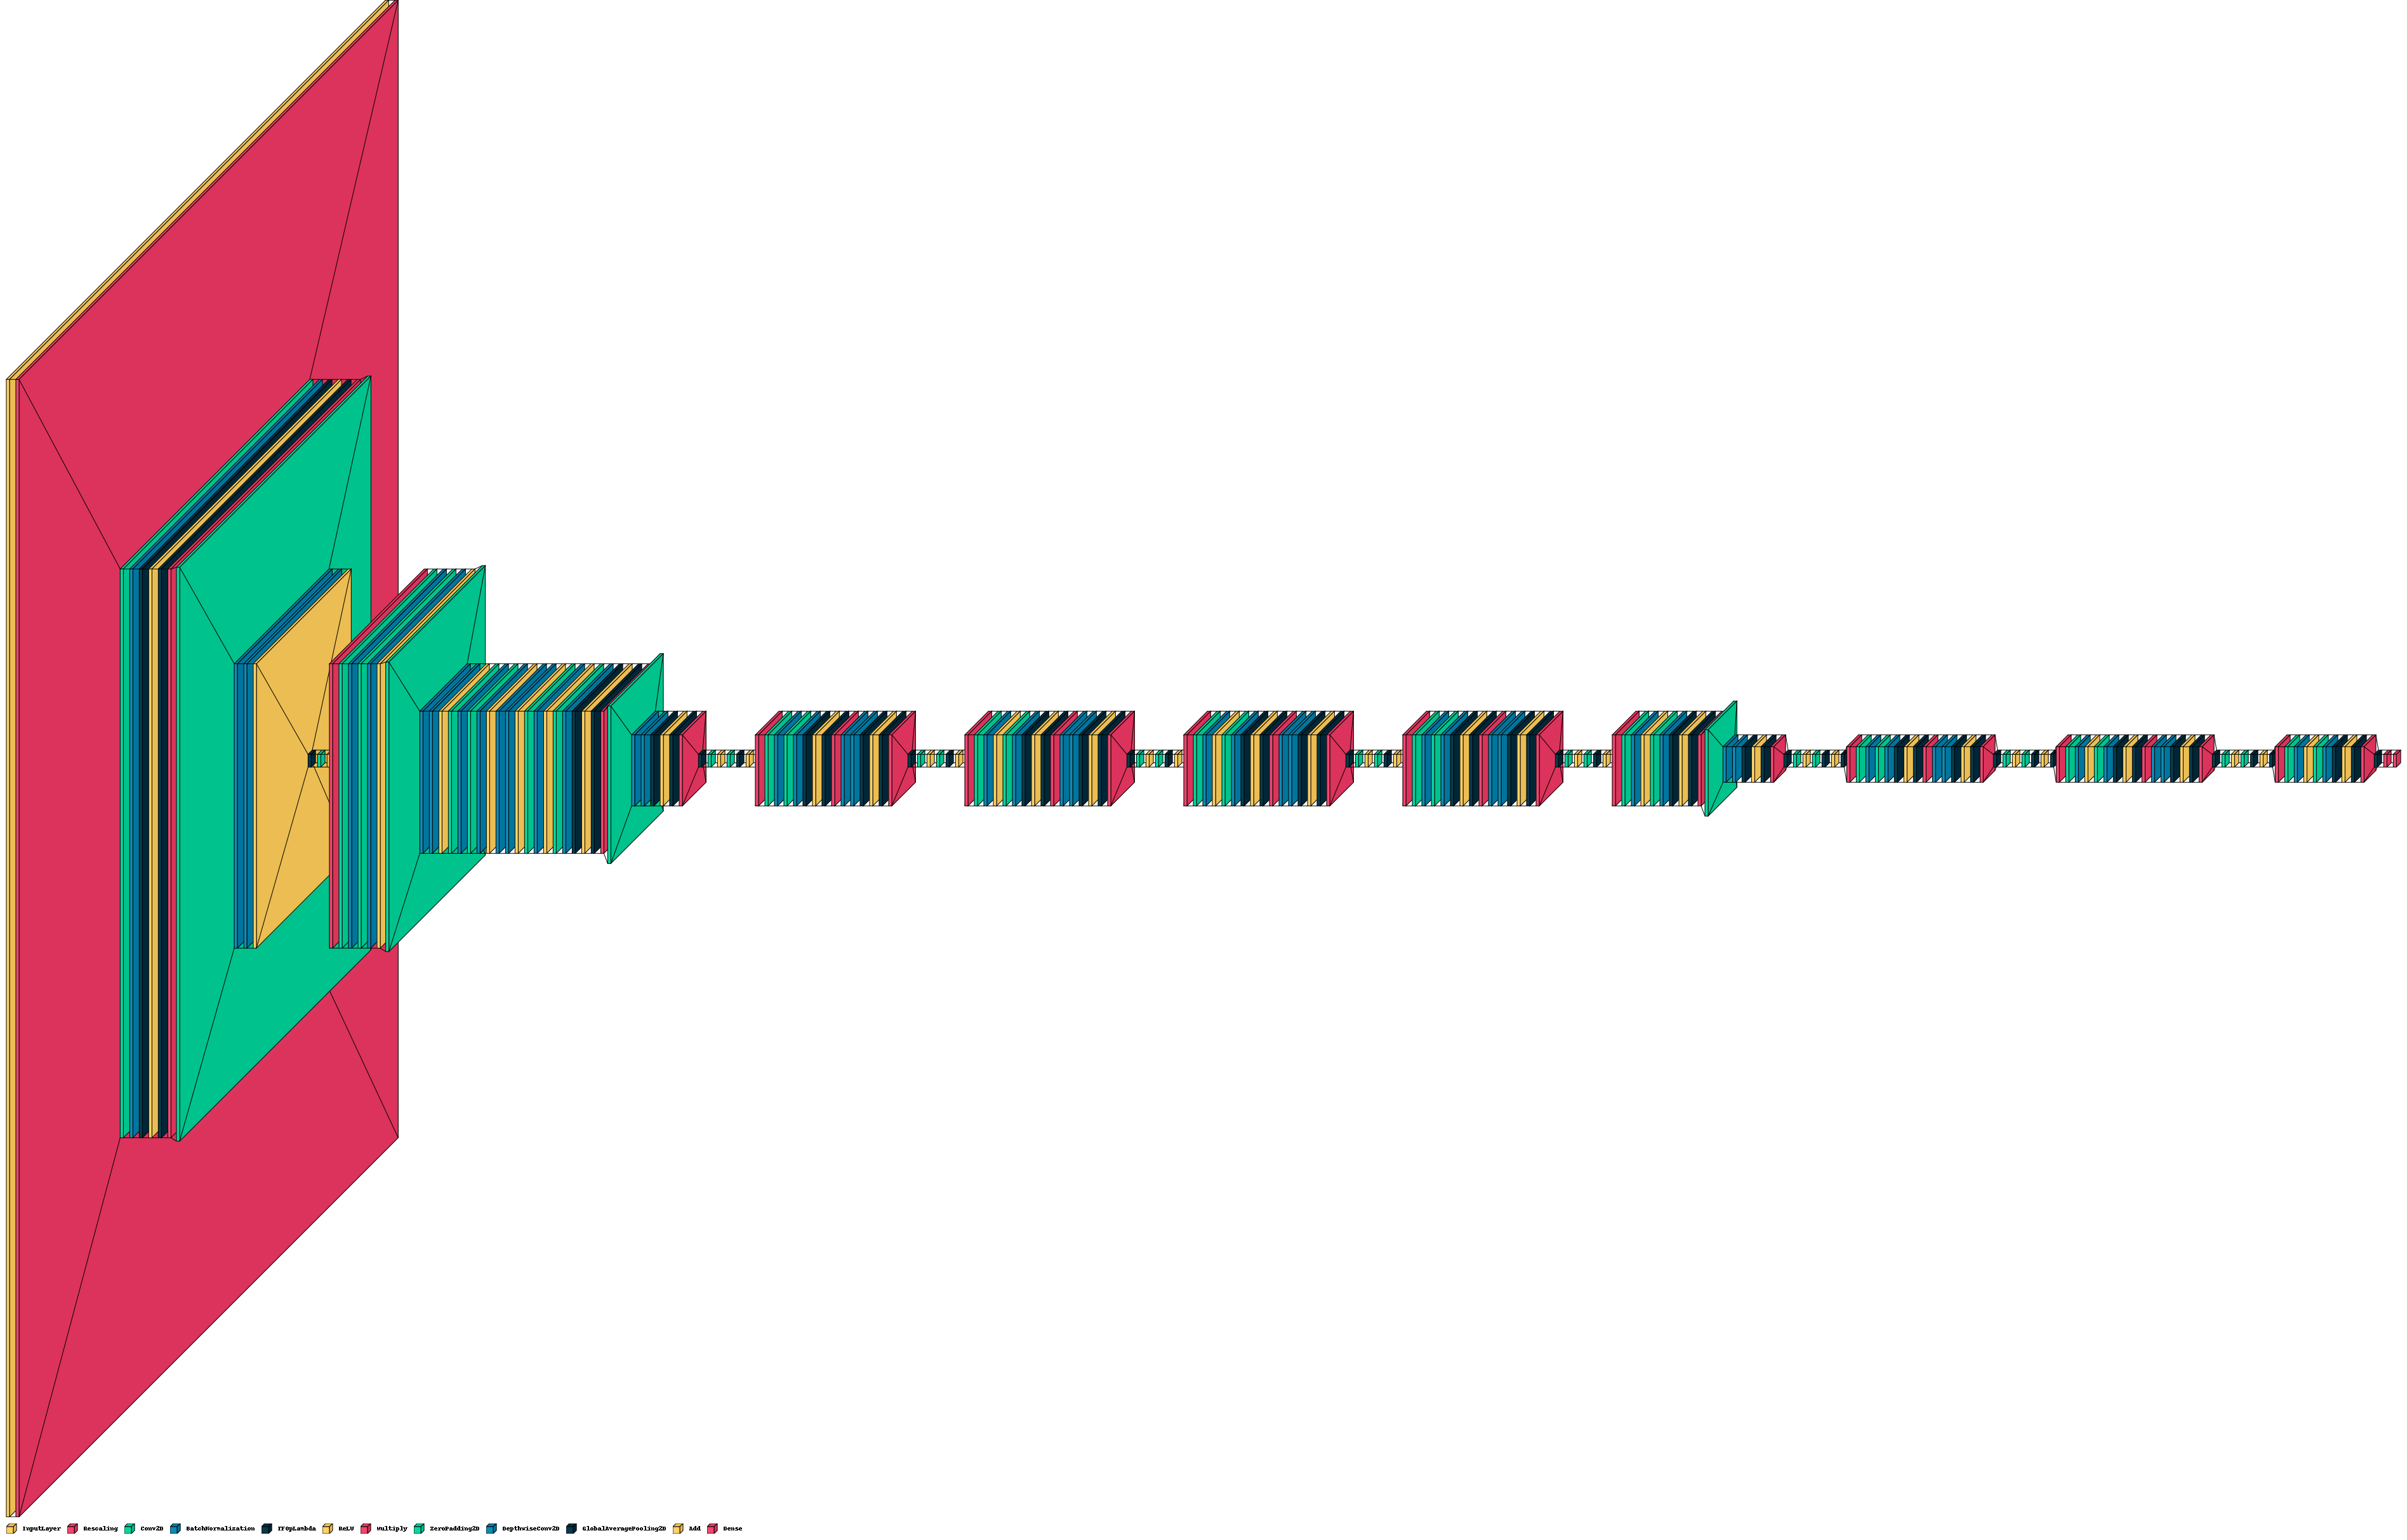

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=5, max_z=5, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 74s 2s/step - loss: 0.7158 - accuracy: 0.5190 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 66s 2s/step - loss: 0.7047 - accuracy: 0.5143 - val_loss: 0.7408 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 65s 2s/step - loss: 0.7058 - accuracy: 0.5369 - val_loss: 0.6696 - val_accuracy: 0.6167
Epoch 4/10
27/27 [==============================] - 67s 2s/step - loss: 0.6787 - accuracy: 0.5595 - val_loss: 0.6642 - val_accuracy: 0.6167
Epoch 5/10
27/27 [==============================] - 63s 2s/step - loss: 0.6717 - accuracy: 0.5750 - val_loss: 0.6619 - val_accuracy: 0.6611
Epoch 6/10
27/27 [==============================] - 66s 2s/step - loss: 0.6805 - accuracy: 0.5810 - val_loss: 0.6663 - val_accuracy: 0.5889
Epoch 7/10
27/27 [==============================] - 65s 2s/step - loss: 0.7060 - accuracy: 0.5417 - val_loss: 0.6669 - val_accuracy: 0.5833
Epoch 8/10
27/27 [==

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 101s 20s/step - loss: 0.6974 - accuracy: 0.5111


[0.6973581314086914, 0.5111111402511597]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 5s 809ms/step - loss: 0.6618 - accuracy: 0.6056
Validation Loss: 0.6618254780769348
Validation Accuracy: 0.605555534362793


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 7s 1s/step - loss: 0.6974 - accuracy: 0.5111
Test Loss: 0.6973580718040466
Test Accuracy: 0.5111111402511597


In [ ]:
# Save the model
#model.save('vgg19_custom.h5')